# Welcome to process assessment 2!
## Quiz

Please answer the following 5 questions.


### 1. **95% Confidence Intervals**

**Question**: What does a 95% confidence interval for a population mean signify?

- A) The interval contains 95% of all sample means.
- B) The population mean is within the interval with 95% certainty.
- C) If we were to take many samples, 95% of the calculated confidence intervals would contain the population mean.
- D) There is a 95% probability that any sample mean lies within the interval.

**Your answer:** C

---

### 2. **Standard Errors**

**Question**: Which of the following best describes the standard error of the mean?

- A) It is the standard deviation of the population.
- B) It measures the accuracy with which a sample represents a population.
- C) It represents the spread of data within a single sample.
- D) It indicates the variability of data points within a sample.

**Your answer:** B

---

### 3. **Sample vs Sampling Distribution**

**Question**: What is the difference between a sample distribution and a sampling distribution?

- A) A sample distribution is the distribution of observations within a sample, while a sampling distribution is the distribution of a statistic across all possible samples of the same size.
- B) A sample distribution is always normal, but a sampling distribution is not.
- C) A sampling distribution refers only to the sample's variance, while a sample distribution refers to its mean.
- D) There is no difference; they are the same concept.

**Your answer:** A

---

### 4. **Test Statistics**

**Question**: Which statement best describes a test statistic?

- A) It is a value that represents the average outcome of a hypothesis test.
- B) It is a measure that quantifies the difference between observed data and what is expected under the null hypothesis.
- C) It always represents the probability that the null hypothesis is true.
- D) It is calculated only in one-sample tests.

**Your answer:** B

---

### 5. **P-values**

**Question**: What does a p-value of 0.03 indicate in the context of a hypothesis test?

- A) There is a 3% chance that the null hypothesis is false.
- B) There is a 3% chance that the null hypothesis is true.
- C) There is a 3% probability of obtaining results at least as extreme as the observed results, assuming the null hypothesis is true.
- D) There is a 97% chance that the observed result is due to random chance.

**Your answer:** C



## Coding 
In this assessment you will run basic analyses on a mobility dataset. 
The dataset (provided as Excel and csv file) includes the count of annualised exit/entries through the TfL (Transport for London) transportation system. 

The content covers the first 3 week of the module. Each Task is worth 1 point (distributed across multiple subtasks).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Task 1. Import and Clean the Data**
- Load the dataset using `pandas`.
- Remove any non-relevant header rows and ensure columns are correctly labeled for easy analysis.
- Handle missing values and ensure data types are appropriate for each column.



In [44]:
# Load the data
df = pd.read_csv('/Users/olisa/Lis/data_sci/week4/process2/data/AC2023_AnnualisedEntryExit.csv', skiprows=5) # Skip rows 5 helps me to skip the nan values in the beginning 
df.head(10)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Monday,Midweek (Tue-Thu),Friday,Saturday,Sunday,Monday.1,Midweek (Tue-Thu).1,Friday.1,Saturday.1,Sunday.1,Weekly,12-week,Annualised
0,Mode,MNLC,MASC,Station,Coverage,Source,Entries,Entries,Entries,Entries,Entries,Exits,Exits,Exits,Exits,Exits,En/Ex,En/Ex,En/Ex
1,LU,500,ACTu,Acton Town,Station entry/exit,Gateline,"7,288","8,125","8,016","6,552","4,684","7,546","8,438","8,245","6,696","5,224","103,940","1,188,670","4,823,835"
2,LU,502,ALDu,Aldgate,Station entry/exit,Gateline,"10,183","12,769","9,612","6,518","4,860","11,247","14,494","11,040","7,982","5,387","148,617","1,699,609","6,897,314"
3,LU,503,ALEu,Aldgate East,Station entry/exit,Gateline,"16,046","19,106","18,158","17,203","12,549","15,225","17,758","17,903","17,163","11,058","235,895","2,697,738","10,947,896"
4,LU,505,ALPu,Alperton,Station entry/exit,Gateline,"4,187","4,234","4,294","3,532","2,487","4,497","4,539","4,413","3,682","2,580","55,992","640,338","2,598,605"
5,LU,506,AMEu,Amersham,Station entry/exit,Gateline,"2,807","3,373","2,724","2,093","1,209","2,712","3,237","2,748","1,914","1,228","37,266","426,182","1,729,521"
6,LU,507,ANGu,Angel,Station entry/exit,Gateline,"16,331","20,242","19,840","18,253","12,006","17,207","21,791","21,935","20,196","12,276","264,142","3,020,769","12,258,814"
7,LU,508,ARCu,Archway,Station entry/exit,Gateline,"11,128","12,701","12,423","10,171","7,087","10,801","12,259","11,356","9,107","6,838","153,792","1,758,791","7,137,484"
8,LU,509,AGRu,Arnos Grove,Station entry/exit,Gateline,"5,172","5,771","5,770","4,808","3,488","4,865","5,400","5,417","4,542","3,391","70,967","811,592","3,293,586"
9,LU,510,ARLu,Arsenal,Station entry/exit,Gateline,"3,118","3,827","3,740","3,734","2,482","3,002","3,553","3,338","3,470","2,459","47,480","542,992","2,203,557"


In [45]:
# we can see the column names are not correct now we must relabel the first 6 to the correct ones just in the row below
# Rename the first 6 columns
df.columns = ['Mode', 'MNLC', 'MASC', 'Station', 'Coverage', 'Source'] + list(df.columns[6:])

# Print the updated column names to verify
print(df.columns)



Index(['Mode', 'MNLC', 'MASC', 'Station', 'Coverage', 'Source', 'Monday',
       'Midweek (Tue-Thu)', 'Friday', 'Saturday', 'Sunday', 'Monday.1',
       'Midweek (Tue-Thu).1', 'Friday.1', 'Saturday.1', 'Sunday.1', 'Weekly',
       '12-week', 'Annualised'],
      dtype='object')


In [46]:
# remove any non-relevant header rows and ensure columns are correctly labeled
# now I want remove the second row. I feel for the purpose of this exercise it is self explanatory the entries and exit part so i will just remove that row
df.head(10)

,Mode,MNLC,MASC,Station,Coverage,Source,Monday,Midweek (Tue-Thu),Friday,Saturday,Sunday,Monday.1,Midweek (Tue-Thu).1,Friday.1,Saturday.1,Sunday.1,Weekly,12-week,Annualised
0,Mode,MNLC,MASC,Station,Coverage,Source,Entries,Entries,Entries,Entries,Entries,Exits,Exits,Exits,Exits,Exits,En/Ex,En/Ex,En/Ex
1,LU,500,ACTu,Acton Town,Station entry/exit,Gateline,"7,288","8,125","8,016","6,552","4,684","7,546","8,438","8,245","6,696","5,224","103,940","1,188,670","4,823,835"
2,LU,502,ALDu,Aldgate,Station entry/exit,Gateline,"10,183","12,769","9,612","6,518","4,860","11,247","14,494","11,040","7,982","5,387","148,617","1,699,609","6,897,314"
3,LU,503,ALEu,Aldgate East,Station entry/exit,Gateline,"16,046","19,106","18,158","17,203","12,549","15,225","17,758","17,903","17,163","11,058","235,895","2,697,738","10,947,896"
4,LU,505,ALPu,Alperton,Station entry/exit,Gateline,"4,187","4,234","4,294","3,532","2,487","4,497","4,539","4,413","3,682","2,580","55,992","640,338","2,598,605"
5,LU,506,AMEu,Amersham,Station entry/exit,Gateline,"2,807","3,373","2,724","2,093","1,209","2,712","3,237","2,748","1,914","1,228","37,266","426,182","1,729,521"
6,LU,507,ANGu,Angel,Station entry/exit,Gateline,"16,331","20,242","19,840","18,253","12,006","17,207","21,791","21,935","20,196","12,276","264,142","3,020,769","12,258,814"
7,LU,508,ARCu,Archway,Station entry/exit,Gateline,"11,128","12,701","12,423","10,171","7,087","10,801","12,259","11,356","9,107","6,838","153,792","1,758,791","7,137,484"
8,LU,509,AGRu,Arnos Grove,Station entry/exit,Gateline,"5,172","5,771","5,770","4,808","3,488","4,865","5,400","5,417","4,542","3,391","70,967","811,592","3,293,586"
9,LU,510,ARLu,Arsenal,Station entry/exit,Gateline,"3,118","3,827","3,740","3,734","2,482","3,002","3,553","3,338","3,470","2,459","47,480","542,992","2,203,557"


In [47]:
# Drop the second row (index 0)
df = df.drop(df.index[0])

# Reset the index after dropping the row
df = df.reset_index(drop=True)


In [48]:
# Print the dataframe to verify
df.head()

,Mode,MNLC,MASC,Station,Coverage,Source,Monday,Midweek (Tue-Thu),Friday,Saturday,Sunday,Monday.1,Midweek (Tue-Thu).1,Friday.1,Saturday.1,Sunday.1,Weekly,12-week,Annualised
0,LU,500,ACTu,Acton Town,Station entry/exit,Gateline,"7,288","8,125","8,016","6,552","4,684","7,546","8,438","8,245","6,696","5,224","103,940","1,188,670","4,823,835"
1,LU,502,ALDu,Aldgate,Station entry/exit,Gateline,"10,183","12,769","9,612","6,518","4,860","11,247","14,494","11,040","7,982","5,387","148,617","1,699,609","6,897,314"
2,LU,503,ALEu,Aldgate East,Station entry/exit,Gateline,"16,046","19,106","18,158","17,203","12,549","15,225","17,758","17,903","17,163","11,058","235,895","2,697,738","10,947,896"
3,LU,505,ALPu,Alperton,Station entry/exit,Gateline,"4,187","4,234","4,294","3,532","2,487","4,497","4,539","4,413","3,682","2,580","55,992","640,338","2,598,605"
4,LU,506,AMEu,Amersham,Station entry/exit,Gateline,"2,807","3,373","2,724","2,093","1,209","2,712","3,237","2,748","1,914","1,228","37,266","426,182","1,729,521"


In [49]:
# Handle missing values and ensure data types are appropriate for each column
# Get the number of missing values per column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Number of missing values per column:\n", missing_values)
print("\nPercentage of missing values per column:\n", missing_percentage)
print("\nData types of each column:\n", data_types)


Number of missing values per column:
 Mode                   0
MNLC                   0
MASC                   0
Station                0
Coverage               0
Source                 0
Monday                 0
Midweek (Tue-Thu)      0
Friday                 0
Saturday               0
Sunday                 0
Monday.1               0
Midweek (Tue-Thu).1    0
Friday.1               0
Saturday.1             0
Sunday.1               0
Weekly                 0
12-week                0
Annualised             0
dtype: int64

Percentage of missing values per column:
 Mode                   0.0
MNLC                   0.0
MASC                   0.0
Station                0.0
Coverage               0.0
Source                 0.0
Monday                 0.0
Midweek (Tue-Thu)      0.0
Friday                 0.0
Saturday               0.0
Sunday                 0.0
Monday.1               0.0
Midweek (Tue-Thu).1    0.0
Friday.1               0.0
Saturday.1             0.0
Sunday.1               0.0

In [51]:
# List of column names to convert to integers
columns_to_convert = [
    'Monday', 'Midweek (Tue-Thu)', 'Friday', 'Saturday', 'Sunday', 
    'Monday.1', 'Midweek (Tue-Thu).1', 'Friday.1', 'Saturday.1', 'Sunday.1', 
    'Weekly', '12-week', 'Annualised', 'MNLC'
]

# Convert these columns to integers, handling any non-numeric values
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Print the data types to verify the conversion
print(df.dtypes)


Mode                   object
MNLC                    Int64
MASC                   object
Station                object
Coverage               object
Source                 object
Monday                  Int64
Midweek (Tue-Thu)       Int64
Friday                  Int64
Saturday                Int64
Sunday                  Int64
Monday.1                Int64
Midweek (Tue-Thu).1     Int64
Friday.1                Int64
Saturday.1              Int64
Sunday.1                Int64
Weekly                  Int64
12-week                 Int64
Annualised              Int64
dtype: object


## **Task 2. Visualise Entry and Exit Counts**
- Create visualisations (e.g., bar charts or line graphs) comparing entry and exit counts across different days (typical weekday, Friday, Saturday, and Sunday).
- Use these visuals to illustrate how entries and exits vary by day.



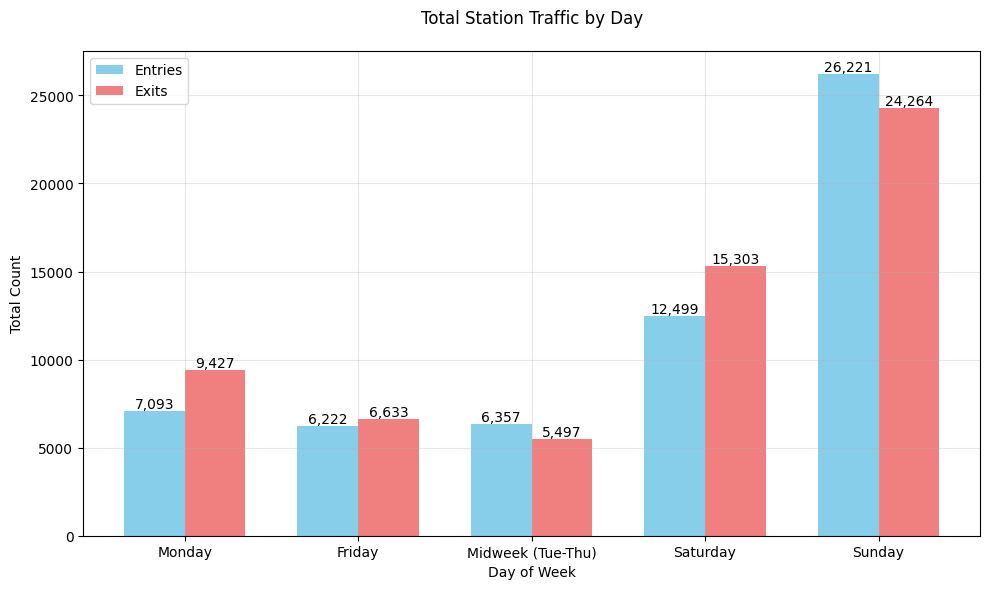

In [68]:
def create_total_traffic_visualization(df):
    # Identify entry and exit columns
    entry_cols = ['Monday', 'Friday', 'Midweek (Tue-Thu)', 'Saturday', 'Sunday']
    exit_cols = [col + '.1' for col in entry_cols]
    
    # Calculate total counts for entries and exits
    entry_totals = df[entry_cols].sum()
    exit_totals = df[exit_cols].sum()
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Day': entry_cols,
        'Entries': entry_totals.values,
        'Exits': exit_totals.values
    })
    
    # Set up the figure for a grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(entry_cols)) 
    width = 0.35 

    # Bar chart for entries and exits
    ax.bar(x - width/2, plot_data['Entries'], width, label='Entries', color='skyblue')
    ax.bar(x + width/2, plot_data['Exits'], width, label='Exits', color='lightcoral')
    
    # Set chart title and labels
    ax.set_title('Total Station Traffic by Day', pad=20)
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Total Count')
    ax.set_xticks(x)
    ax.set_xticklabels(entry_cols)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Add value labels to the bars
    for i, v in enumerate(plot_data['Entries']):
        ax.text(i - width/2, v, f'{int(v):,}', ha='center', va='bottom')
    for i, v in enumerate(plot_data['Exits']):
        ax.text(i + width/2, v, f'{int(v):,}', ha='center', va='bottom')
    
    plt.tight_layout()
    return fig


fig = create_total_traffic_visualization(df)
plt.show()


## **Task 3. Calculate Descriptive Statistics**
- Compute descriptive statistics (mean, median, minimum, maximum) for each day (weekday, Friday, Saturday, Sunday).
- Summarize these statistics to provide insights into typical entry/exit behavior patterns.

In [60]:
def analyze_station_traffic(df):
    
    # First, clean the data by removing the header row and resetting index
    df = df.iloc[1:].reset_index(drop=True)
    
    # Convert numeric columns to float if they aren't already
    numeric_cols = ['Monday', 'Friday', 'Saturday', 'Sunday',
                   'Monday.1', 'Friday.1', 'Saturday.1', 'Sunday.1']
    
    for col in numeric_cols:
        # Check if the column is already numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            # If it's string, remove commas and convert
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
        else:
            # If it's already numeric, just ensure it's float
            df[col] = df[col].astype(float)
    
    # Identify entry and exit columns
    entry_cols = ['Monday', 'Friday', 'Saturday', 'Sunday']
    exit_cols = [col + '.1' for col in entry_cols]
    
    # Calculate descriptive statistics
    entry_stats = df[entry_cols].describe()
    exit_stats = df[exit_cols].describe()
    
    # Rename exit columns to match entry columns for easier comparison
    exit_stats.columns = entry_cols
    
    # Add total traffic for each day
    entry_stats.loc['sum'] = df[entry_cols].sum()
    exit_stats.loc['sum'] = df[exit_cols].sum()
    
    # Create a summary comparing entries vs exits
    summary_data = {
        'Day': entry_cols,
        'Total Entries': df[entry_cols].sum().values,
        'Total Exits': df[exit_cols].sum().values
    }
    
    # Calculate Entry/Exit Ratio
    summary_data['Entry/Exit Ratio'] = (
        summary_data['Total Entries'] / summary_data['Total Exits']
    ).round(3)
    
    summary = pd.DataFrame(summary_data)
    
    return {
        'entries': entry_stats,
        'exits': exit_stats,
        'summary': summary
    }

def print_traffic_analysis(df):

    stats = analyze_station_traffic(df)
    
    print("\n=== DAILY TRAFFIC SUMMARY ===")
    # Format large numbers with commas
    stats['summary']['Total Entries'] = stats['summary']['Total Entries'].map('{:,.0f}'.format)
    stats['summary']['Total Exits'] = stats['summary']['Total Exits'].map('{:,.0f}'.format)
    print(stats['summary'].to_string(index=False))
    
    print("\n=== ENTRY STATISTICS ===")
    print(stats['entries'].round(1).to_string())
    
    print("\n=== EXIT STATISTICS ===")
    print(stats['exits'].round(1).to_string())


stats = analyze_station_traffic(df)
print_traffic_analysis(df)


=== DAILY TRAFFIC SUMMARY ===
     Day Total Entries Total Exits  Entry/Exit Ratio
  Monday         7,093       9,427             0.752
  Friday         6,222       6,633             0.938
Saturday        12,499      15,303             0.817
  Sunday        26,221      24,264             1.081

=== ENTRY STATISTICS ===
       Monday  Friday  Saturday   Sunday
count    10.0     9.0      19.0     41.0
mean    709.3   691.3     657.8    639.5
std     154.5   193.9     226.7    239.3
min     395.0   324.0     279.0    132.0
25%     628.0   581.0     490.5    451.0
50%     708.0   716.0     702.0    652.0
75%     819.0   846.0     821.5    812.0
max     946.0   921.0     977.0    992.0
sum    7093.0  6222.0   12499.0  26221.0

=== EXIT STATISTICS ===
       Monday  Friday  Saturday  Sunday
count    13.0    10.0      23.0    39.0
mean    725.2   663.3     665.3   622.2
std     179.2   191.3     239.9   251.5
min     453.0   360.0     189.0   119.0
25%     600.0   529.0     507.5   461.0
50%

Summarise these statistics to provide insights into typical entry/exit behavior patterns.

Daily Trends:

Sunday has the highest traffic, with 26,221 entries and 24,264 exits, showing an entry/exit ratio of 1.081 (more entries than exits).

Saturday follows, with 12,499 entries and 15,303 exits, and a lower entry/exit ratio of 0.817, indicating more exits.

Friday and Monday have similar entry/exit ratios (0.938 and 0.752, respectively), with Monday showing slightly higher exits than Friday.

Entry and Exit Patterns:

Variability: Sunday exhibits the highest variability in entries and exits, while Monday shows more consistent entry levels.

Averages: Mean entries and exits are lower on weekdays (Monday, Friday) compared to weekends (Saturday, Sunday), indicating higher activity during weekends.

Ranges: Both entries and exits show a wider range on weekends, with maximum values nearing 1,000 on Sunday, highlighting busier weekend periods

## **Task 4. Calculate Standard Error and Confidence Intervals**
- For each day’s entries and exits, calculate the standard error of the mean.
- Construct a 95% confidence interval for the mean entry and exit counts across different days.



In [69]:
import scipy.stats as stats

def calculate_statistics(df):
    # Identify the relevant columns
    entry_cols = ['Monday', 'Friday', 'Midweek (Tue-Thu)', 'Saturday', 'Sunday']
    exit_cols = [col + '.1' for col in entry_cols]

    # Dictionary to store results
    statistics = {
        'Day': [],
        'Entry_Mean': [],
        'Entry_SEM': [],
        'Entry_CI_Lower': [],
        'Entry_CI_Upper': [],
        'Exit_Mean': [],
        'Exit_SEM': [],
        'Exit_CI_Lower': [],
        'Exit_CI_Upper': []
    }
    
    # Loop through each day to calculate statistics
    for entry_col, exit_col in zip(entry_cols, exit_cols):
        # Calculate mean and SEM for entries
        entry_mean = df[entry_col].mean()
        entry_std = df[entry_col].std()
        entry_sem = entry_std / np.sqrt(len(df[entry_col]))
        
        # Calculate 95% confidence interval for entries
        entry_ci_lower = entry_mean - 1.96 * entry_sem
        entry_ci_upper = entry_mean + 1.96 * entry_sem
        
        # Calculate mean and SEM for exits
        exit_mean = df[exit_col].mean()
        exit_std = df[exit_col].std()
        exit_sem = exit_std / np.sqrt(len(df[exit_col]))
        
        # Calculate 95% confidence interval for exits
        exit_ci_lower = exit_mean - 1.96 * exit_sem
        exit_ci_upper = exit_mean + 1.96 * exit_sem
        
        # Append results to the dictionary
        statistics['Day'].append(entry_col)
        statistics['Entry_Mean'].append(entry_mean)
        statistics['Entry_SEM'].append(entry_sem)
        statistics['Entry_CI_Lower'].append(entry_ci_lower)
        statistics['Entry_CI_Upper'].append(entry_ci_upper)
        statistics['Exit_Mean'].append(exit_mean)
        statistics['Exit_SEM'].append(exit_sem)
        statistics['Exit_CI_Lower'].append(exit_ci_lower)
        statistics['Exit_CI_Upper'].append(exit_ci_upper)

    # Convert dictionary to DataFrame for easier viewing
    stats_df = pd.DataFrame(statistics)
    
    return stats_df

stats_df = calculate_statistics(df)
print(stats_df)


                 Day  Entry_Mean  Entry_SEM  Entry_CI_Lower  Entry_CI_Upper  \
0             Monday  709.300000   7.126253      695.332545      723.267455   
1             Friday  691.333333   8.944837      673.801453      708.865214   
2  Midweek (Tue-Thu)  706.333333   7.621149      691.395881      721.270786   
3           Saturday  657.842105  10.457482      637.345441      678.338770   
4             Sunday  639.536585  11.039032      617.900083      661.173088   

    Exit_Mean   Exit_SEM  Exit_CI_Lower  Exit_CI_Upper  
0  725.153846   8.265622     708.953226     741.354466  
1  663.300000   8.821853     646.009169     680.590831  
2  687.125000   7.046284     673.314284     700.935716  
3  665.347826  11.066229     643.658016     687.037636  
4  622.153846  11.599642     599.418549     644.889144  


## **Task 5. Compare Means Using Confidence Intervals**
- Using the confidence intervals, compare mean entry/exit counts across different days (e.g., typical weekday vs. Friday).
- Interpret whether differences between days are statistically significant based on overlap or separation of the intervals.


In [71]:
# Using the confidence intervals, compare mean entry/exit counts across different days (e.g., typical weekday vs. Friday).
def compare_means_using_cis(stats_df):
    # Initialize lists to track comparisons
    comparisons = []

    # Iterate through pairs of days to compare
    for i in range(len(stats_df)):
        for j in range(i + 1, len(stats_df)):
            day1, day2 = stats_df.iloc[i], stats_df.iloc[j]

            # Entry confidence intervals for the two days
            entry_ci_day1 = (day1['Entry_CI_Lower'], day1['Entry_CI_Upper'])
            entry_ci_day2 = (day2['Entry_CI_Lower'], day2['Entry_CI_Upper'])
            entry_overlap = (entry_ci_day1[1] >= entry_ci_day2[0]) and (entry_ci_day2[1] >= entry_ci_day1[0])

            # Exit confidence intervals for the two days
            exit_ci_day1 = (day1['Exit_CI_Lower'], day1['Exit_CI_Upper'])
            exit_ci_day2 = (day2['Exit_CI_Lower'], day2['Exit_CI_Upper'])
            exit_overlap = (exit_ci_day1[1] >= exit_ci_day2[0]) and (exit_ci_day2[1] >= exit_ci_day1[0])

            # Append results for entries
            comparisons.append({
                'Comparison': f"{day1['Day']} vs {day2['Day']}",
                'Entries_Overlap': entry_overlap,
                'Entries_Significance': "Significant" if not entry_overlap else "Not Significant",
                'Exits_Overlap': exit_overlap,
                'Exits_Significance': "Significant" if not exit_overlap else "Not Significant"
            })

    # Convert to DataFrame for readability
    comparison_df = pd.DataFrame(comparisons)
    return comparison_df

# Use the function with the previously computed stats_df
comparison_results = compare_means_using_cis(stats_df)
print(comparison_results)


                      Comparison  Entries_Overlap Entries_Significance  \
0               Monday vs Friday             True      Not Significant   
1    Monday vs Midweek (Tue-Thu)             True      Not Significant   
2             Monday vs Saturday            False          Significant   
3               Monday vs Sunday            False          Significant   
4    Friday vs Midweek (Tue-Thu)             True      Not Significant   
5             Friday vs Saturday             True      Not Significant   
6               Friday vs Sunday            False          Significant   
7  Midweek (Tue-Thu) vs Saturday            False          Significant   
8    Midweek (Tue-Thu) vs Sunday            False          Significant   
9             Saturday vs Sunday             True      Not Significant   

   Exits_Overlap Exits_Significance  
0          False        Significant  
1          False        Significant  
2          False        Significant  
3          False        Significa

# Interpret whether differences between days are statistically significant based on overlap or separation of the intervals.
Entries:

Significant differences (no overlap in confidence intervals) were found for:

Monday vs Saturday
Monday vs Sunday
Friday vs Sunday
Midweek (Tue-Thu) vs Saturday
Midweek (Tue-Thu) vs Sunday
No significant differences (overlapping intervals) were found between typical weekdays (Monday, Friday, Midweek) or Saturday vs Sunday.

Exits:

Significant differences were found for:

Monday vs all other days
Friday vs Sunday
Midweek (Tue-Thu) vs Sunday
Overlapping intervals were observed between Friday and Saturday, Friday and Midweek (Tue-Thu), and Saturday and Sunday, indicating no significant differences for exits on those days.

These findings suggest that entry counts show distinct patterns on weekends versus weekdays, while exits vary more noticeably between individual days, especially Monday compared to others.
